### Draw volcano plot and test global methylation shift 
<!-- Using my `down-viz` conda env.  -->

> - https://stackoverflow.com/questions/8545035/scatterplot-with-marginal-histograms-in-ggplot2 
> - https://github.com/daattali/ggExtra 

In [ ]:
# %reload_ext rpy2.ipython

In [1]:
# %%R 
library (ggExtra)
library (ggplot2)
library (ggrepel)
library (patchwork)
library (tidyverse)

source('../util.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Load `diff-mtyl` results:

In [ ]:
# %%R 
# Significant bins: FDR<0.2 and logFC > 0.5
res = read.table('hl60_delta_mtyl_table.txt', header=TRUE,stringsAsFactors=FALSE)

Volcano plot and histogram 

In [16]:
# %%R 
plot_hyperhypo <- function(
    res, lfc.cutoff  = 1, pval.cutoff = 0.001,
    x_min=-7,x_max=7, labels=FALSE
){
    w <- wilcox.test(res$logFC, mu=0, alternative = "greater")
    t <- t.test(res$logFC, mu=0, alternative = "greater")
    
    res$sig <- as.factor(res$p_value < pval.cutoff & abs(res$logFC) > lfc.cutoff)
    relevel(res$sig, ref=TRUE)

    p = res %>% ggplot(
        aes(x=logFC, y=-log10(p_value), colour=sig, fill=sig)) +
        geom_point(aes(color = sig),alpha = 4/10) +
            xlim(c(x_min,x_max)) +
#             ylim(c(2,15)) +
            geom_hline(yintercept=-log10(pval.cutoff), linetype="dashed", alpha = 4/10) +
            geom_vline(xintercept=lfc.cutoff, linetype="dashed", alpha = 4/10) +
            geom_vline(xintercept=(-1)*lfc.cutoff, linetype="dashed", alpha = 4/10) +
            geom_label_repel(
                data = res %>% filter(name %in% labels),
                size=2, 
                segment.colour = "black",
                aes(label = name), 
                color = 'grey10',fill='white',
                box.padding = 1, max.overlaps = Inf) + 
            scale_color_manual(values = c("grey50", "green4")) +
            ggtitle(sprintf(
                "\n[mu=0,alter=greater]\nwilcox.test (-log10 p.value): %.5f\nt.test (-log10 p.value):%.5f", 
                -log10(w$p.value), -log10(t$p.value))) +
            theme_bw() + 
            theme(
                # aspect.ratio = 0.6,
                legend.position="none",
                rect=element_rect(fill="transparent"),
                plot.title = element_text(size = 6),
                # axis.text=element_text(size=8),
                # axis.title=element_text(size=10),
                # panel.border = element_blank(),
                panel.grid = element_blank(),
                panel.background= element_blank()
            )
    return (p)
} 

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


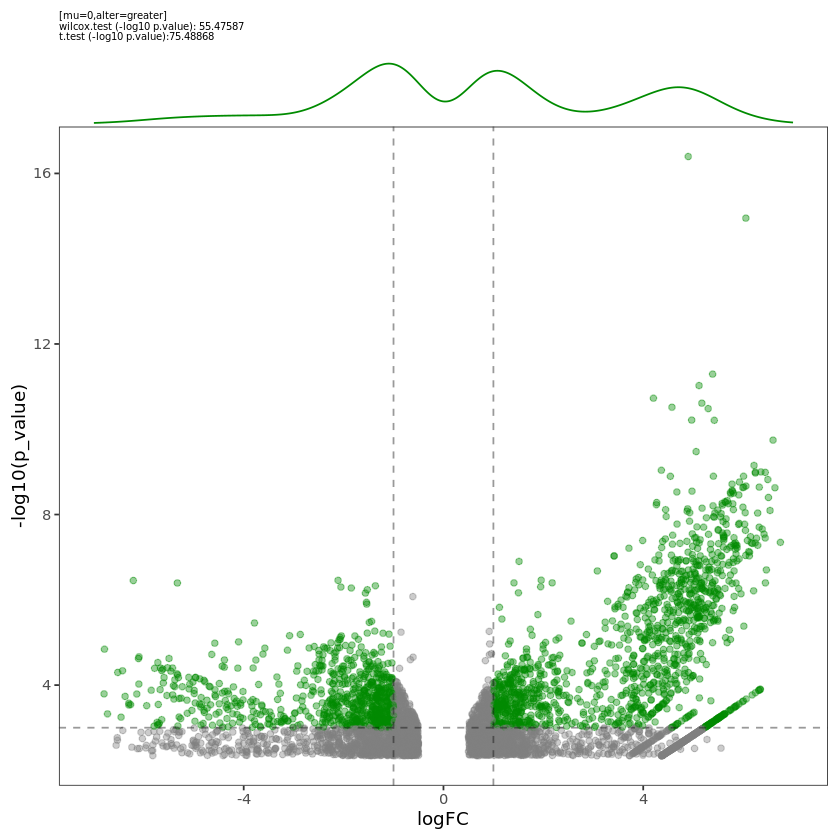

In [17]:
vol = plot_hyperhypo (res)
p = ggExtra::ggMarginal(vol, margins = "x", size = 10, #type = "histogram",
           col = "green4")#, fill = "")

plot_Save(p, 'plots/d_mtyl_T_vs_U',w = 3, h = 4)
p

___
# 

In [50]:
# conda env export --from-history

In [18]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4    
 [5] readr_2.0.2     tidyr_1.1.4     tibble_3.1.6    tidyverse_1.3.1
 [9] patchwork_1.1.1 ggrepel_0.9.1   ggplot2_3.3.5   ggExtra_0.9    

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7       lubridate_1.8.0  